# Understanding Convolutions

In [5]:
#pip install pooch

  Obtaining dependency information for pooch from https://files.pythonhosted.org/packages/f4/72/8ae0f1ba4ce6a4f6d4d01a60a9fdf690fde188c45c1872b0b4ddb0607ace/pooch-1.8.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/63.0 kB ? eta -:--:--
   ------ --------------------------------- 10.2/63.0 kB ? eta -:--:--
   ---------------------------------------- 63.0/63.0 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
#pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB 3.2 MB/s eta 0:00:13
   ---------------------------------------- 0.2/38.6 MB 3.0 MB/s eta 0:00:13
   ---------------------------------------- 0.3/38.6 MB 2.9 MB/s eta 0:00:14
   ---------------------------------------- 0.5/38.6 MB 2.8 MB/s eta 0:00:14
    --------------------------------------- 0.6/38.6 MB 2.8 MB/s eta 0:00:14
    --------------------------------------- 0.7/38.6 MB 2.9 MB/s eta 0:00:14
    --------------------------------------- 0.9/38.6 MB 2.9 MB/s eta 0:00:14
    --------------------------------------- 1.0/38.6 MB 2.7 MB/s eta 0:00:14
   - -------------------------------------- 1.1/38.6 MB 2.8 MB/s eta 0:00:14
   - -----------

In [3]:
import cv2 # pip install opencv-python
import numpy as np
from scipy.datasets import ascent
import pooch

In [4]:
i = ascent()

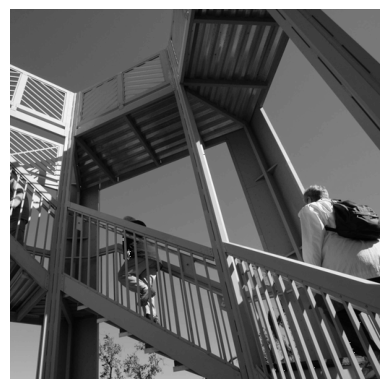

In [5]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [6]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

First, make a convolution matrix (or kernel) as a 3x3 array:

In [7]:
# This filter detects edges nicely
# It creates a filter that only passes through sharp edges and straight lines. 
# Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]] 
# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
 # If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

Now, calculate the output pixels. Iterate over the image, leaving a 1-pixel margin, and multiply each of the neighbors of the current pixel by the value defined in the filter.

That means that the current pixel's neighbor above it and to the left of it will be multiplied by the top-left item in the filter. Then, multiply the result by the weight and ensure that the result is in the range 0 through 255.

Finally, load the new value into the transformed image:

In [8]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[1][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel

Now, plot the image to see the effect of passing the filter over it:

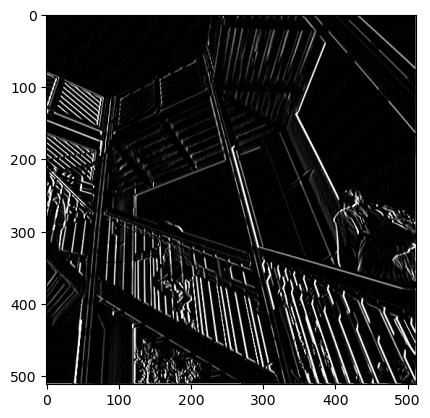

In [9]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()  

Let's try with a different filter:

In [10]:
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

In [11]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[1][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel

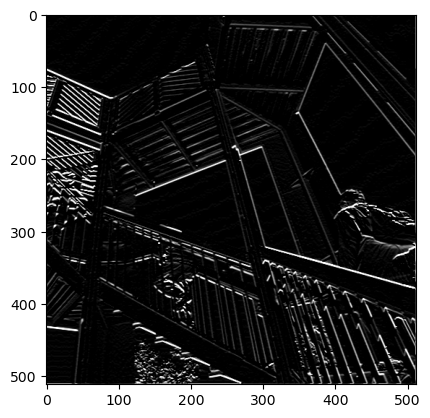

In [12]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()  

Now that you've identified the essential features of the image, what do you do? How do you use the resulting feature map to classify images?

Similar to convolutions, pooling greatly helps with detecting features. Pooling layers reduce the overall amount of information in an image while maintaining the features that are detected as present.

There are a number of different types of pooling, but you'll use one called Maximum (Max) Pooling.

Iterate over the image and, at each point, consider the pixel and its immediate neighbors to the right, beneath, and right-beneath. Take the largest of those (hence max pooling) and load it into the new image. Thus, the new image will be one-fourth the size of the old.

The following code will show a (2, 2) pooling. Run it to see the output.

You'll see that while the image is one-fourth the size of the original, it kept all the features.

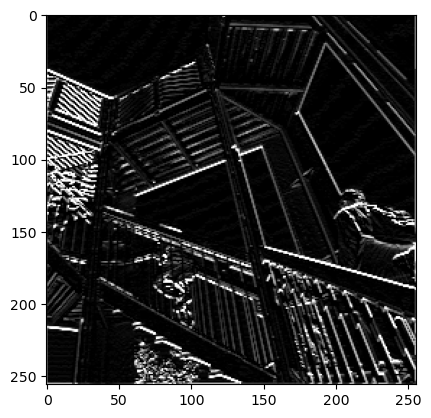

In [13]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]
 
# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()